In [2]:
#import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to show figures inline in notebook without usint plt.show
%matplotlib inline

In [3]:
#Load dataset
habermans = pd.read_csv("Haberman's Dataset.csv")
habermans.head()

,age,year_of_operation,axillary_nodes,survival_class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Features
<br/>
age = age of patient <br/>
year_of_operation = Year of operation (1900s) <br/>
axillary_nodes = Lymph Nodes <br/>
**survival_class** <br/>
1 = Patient Survived 5 years or longer <br/>
2 = Patient Survived less than 5 years <br/>

### Bivariate Analysis to find out which features are significant for classification

**Pair Plots**

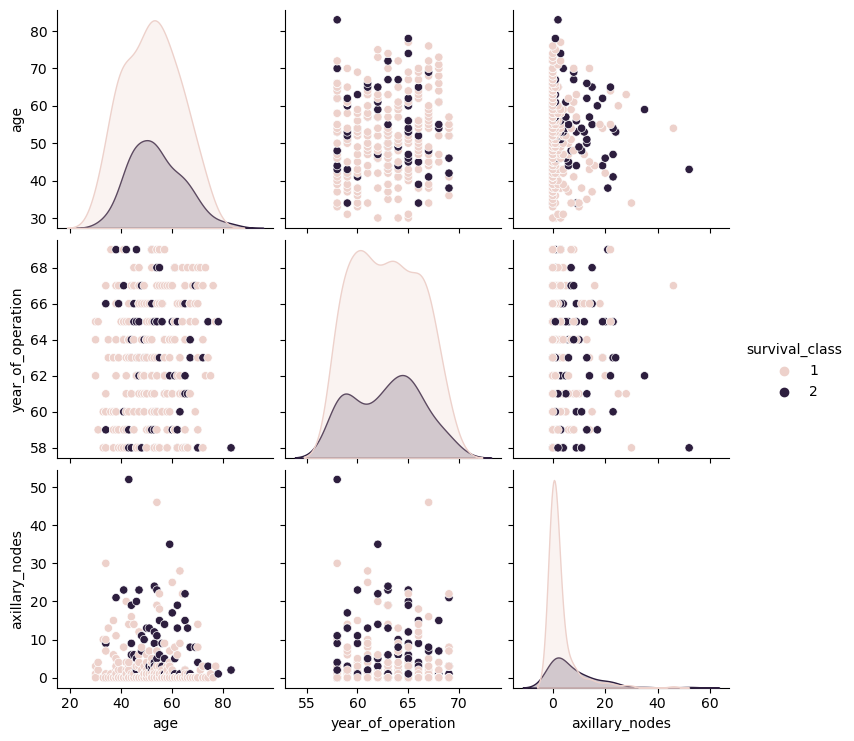

In [5]:
sns.pairplot(habermans, hue='survival_class', kind='scatter')

**Observations**
1. There is no separation of any kind in any of the pair plots, i.e, there is overlap between the two classes
2. We cannot classify the survival class based on any two feauters

### Univariate Analysis to find out which features are significant for classification

**Univariate Analysis using PDF**

Text(0.5, 1.0, 'PDF for Age')

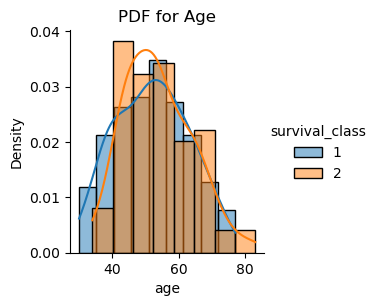

In [11]:
grid = sns.FacetGrid(habermans, hue='survival_class')
grid.map(sns.histplot, 'age', kde='True', stat='density').add_legend()
plt.title('PDF for Age')

Text(0.5, 1.0, 'PDF for Year of Operation')

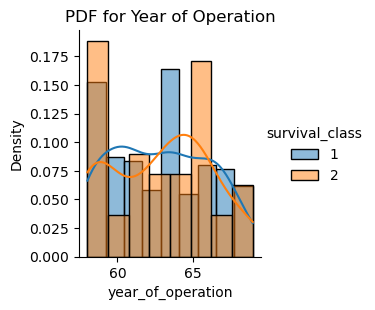

In [12]:
grid = sns.FacetGrid(habermans, hue='survival_class')
grid.map(sns.histplot, 'year_of_operation', kde='True', stat='density').add_legend()
plt.title('PDF for Year of Operation')

Text(0.5, 1.0, 'PDF for Axillary Nodes')

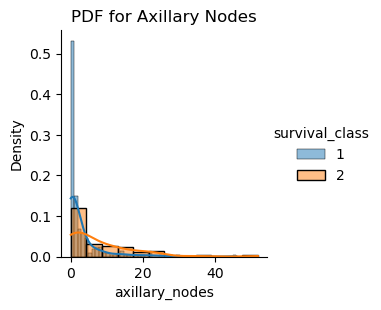

In [13]:
grid = sns.FacetGrid(habermans, hue='survival_class')
grid.map(sns.histplot, 'axillary_nodes', kde='True', stat='density').add_legend()
plt.title('PDF for Axillary Nodes')

**Observation**
1. For the PDF of age and year_of_operation) there is overlap of two classes
2. For Axillary Nodes there is still overlap but there is a possibility of classification

**Univariate Analysis on Axillary Nodes with PDF and CDF**

In [16]:
# Separate the classes into two datasets
habermans_1 = habermans[habermans['survival_class'] == 1]
habermans_2 = habermans[habermans['survival_class'] == 2]

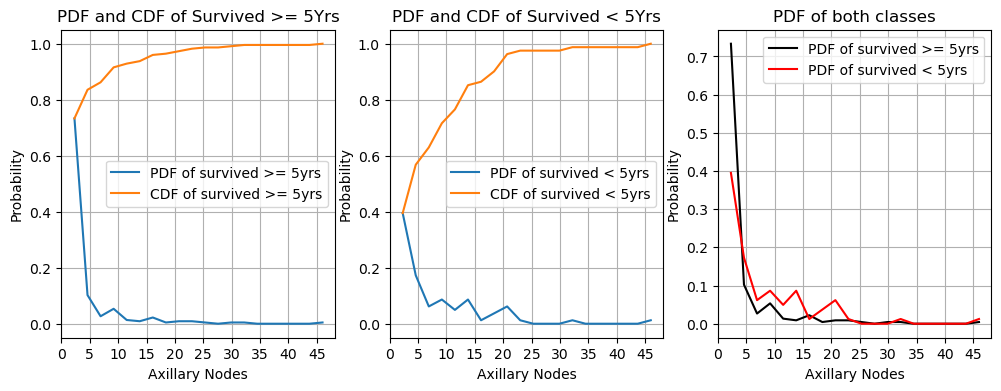

In [64]:
#plot for 'survived>=5yrs'
count,bin_edges = np.histogram(habermans_1['axillary_nodes'],bins=20,density=True)
PDF = count/sum(count)
CDF = np.cumsum(PDF)

#plot for 'survived<5yrs'
count2,bin_edges2 = np.histogram(habermans_2['axillary_nodes'],bins=20,density=True)
PDF2 = count2/sum(count2)
CDF2 = np.cumsum(PDF2)

fig, axes = plt.subplots(1,3, figsize = (12,4))
axes[0].plot(bin_edges[1:],PDF,label="PDF of survived >= 5yrs")
axes[0].plot(bin_edges[1:],CDF,label="CDF of survived >= 5yrs")
axes[0].legend()
axes[0].set_xlabel('Axillary Nodes')
axes[0].set_ylabel('Probability')
axes[0].set_title('PDF and CDF of Survived >= 5Yrs')
axes[0].set_xticks(np.arange(0, 50, 5))
axes[0].grid()

axes[1].plot(bin_edges[1:],PDF2,label="PDF of survived < 5yrs")
axes[1].plot(bin_edges[1:],CDF2,label="CDF of survived < 5yrs")
axes[1].legend()
axes[1].set_xlabel('Axillary Nodes')
axes[1].set_ylabel('Probability')
axes[1].set_title('PDF and CDF of Survived < 5Yrs')
axes[1].set_xticks(np.arange(0, 50, 5))
axes[1].grid()

axes[2].plot(bin_edges[1:],PDF,label="PDF of survived >= 5yrs", color='black')
axes[2].plot(bin_edges[1:],PDF2,label="PDF of survived < 5yrs", color='red')
axes[2].legend()
axes[2].set_xlabel('Axillary Nodes')
axes[2].set_ylabel('Probability')
axes[2].set_title('PDF of both classes')
axes[2].set_xticks(np.arange(0, 50, 5))
axes[2].grid()


**Observations**
1. From the CDF >= 5 Yrs we can say that approximately 90% of patients with less than 10 axillary nodes survived for more than 5 years
2. The CDF < 5 contradicts the above fact as we can see 70% of patients with less than 10 axillary nodes survived for less than 5 years
3. There is overlap between the PDFs of the two classes